# 2025-1 보건빅데이터통계분석 기말고사

---



**# 각 문제에는 결과 해석을 작성해야 합니다.**

## 1. G제약회사에서는 새로운 진통제를 개발하였다.새로운 진통제의 지속효과가 300분인지 검증해 보세요.
- 04_4.painkiller.csv
- 1. 지속시간1, 지속시간2, 지속시간3은
300분인가?
- 2. 지속시간1, 지속시간2, 지속시간3 은
정규분포가정을 만족하는가?
- 3. 만약, 지속시간3이 300분보다 작은지
검증한다면 작다고 할 수 있는가?


### 1.기본 package 설정

In [1]:
# 그래프에서 한글 폰트 인식하기(Corab용)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의


Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
!pip install pingouin

#  *** 세션 다시 시작

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
# 패키지 미설치시
# pip install numpy pandas matplotlib seaborn scipy pingouin

In [44]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg          #통계분석을 위한 패키지
from scipy import stats        #고급통계함수 패키지
import statsmodels.api as sm    #통계 모델링 패키지

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [22]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='Malgun Gothic')
#plt.rcParams['axes.unicode_minus'] = False # -인식

In [7]:
# 시스템에 설치된 폰트 확인
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
print(font_list)  # 설치된 폰트 목록 확인

['STIXGeneral', 'cmex10', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'DejaVu Serif Display', 'cmss10', 'STIXNonUnicode', 'cmb10', 'cmtt10', 'DejaVu Serif', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans', 'DejaVu Serif', 'STIXSizeOneSym', 'cmmi10', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXNonUnicode', 'DejaVu Sans', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'cmsy10', 'DejaVu Sans', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeFiveSym', 'cmr10', 'DejaVu Sans', 'STIXNonUnicode', 'STIXSizeFourSym', 'STIXGeneral', 'HYPMokGak-Bold', 'MV Boli', 'Segoe UI Symbol', 'Constantia', 'Palatino Linotype', 'Century', 'Dubai', 'MS Reference Sans Serif', 'Berlin Sans FB', 'Rockwell Extra Bold', 'Candara', 'Jokerman', 'Lucida Sans Typewriter', 'Perpetua', 'MS Reference Specialty', 'Arial', 'Agency FB', 'Showcard Gothic', 'Magneto', 'Calibri', 'OCR A Extended', 'Lucida Fax', 'Calibri', 'Agency FB', 'M

### 2. 데이터 불러오기

In [9]:
pk_df = pd.read_csv('./data/04_4.painkiller.csv', encoding="cp949")
pk_df.head()

,지속시간1,지속시간2,지속시간3
0,299,295,294
1,300,296,295
2,294,290,294
3,294,290,295
4,296,292,296


In [10]:
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   지속시간1   51 non-null     int64
 1   지속시간2   51 non-null     int64
 2   지속시간3   51 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [11]:
pk_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
지속시간1,51.0,303.47,4.29,294.0,301.0,303.0,306.0,313.0
지속시간2,51.0,299.47,4.29,290.0,297.0,299.0,302.0,309.0
지속시간3,51.0,298.90,4.00,292.0,296.0,298.0,301.0,308.0


### 3. 데이터 검정

In [15]:
pg.ttest(pk_df['지속시간1'], 300, alternative = "two-sided").round(3)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.782,50,two-sided,0.0,"[302.26, 304.68]",0.81,3.27e+04,1.0


In [16]:
pg.ttest(pk_df['지속시간2'], 300, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.882,50,two-sided,0.382,"[298.26, 300.68]",0.124,0.22,0.139


In [17]:
pg.ttest(pk_df['지속시간3'], 300, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.96,50,two-sided,0.056,"[297.78, 300.03]",0.274,0.89,0.485


지속시간 1은 300분이 아님. 지속시간 2,3은 300분.

In [18]:
pg.normality(pk_df['지속시간1']).round(3)

,W,pval,normal
지속시간1,0.978,0.457,True


In [19]:
pg.normality(pk_df['지속시간2']).round(3)

,W,pval,normal
지속시간2,0.978,0.457,True


In [20]:
pg.normality(pk_df['지속시간3']).round(3)

,W,pval,normal
지속시간3,0.94,0.012,False


지속시간 1,2는 정규분포를 만족하지만 지속시간 3은 만족하지 않음.

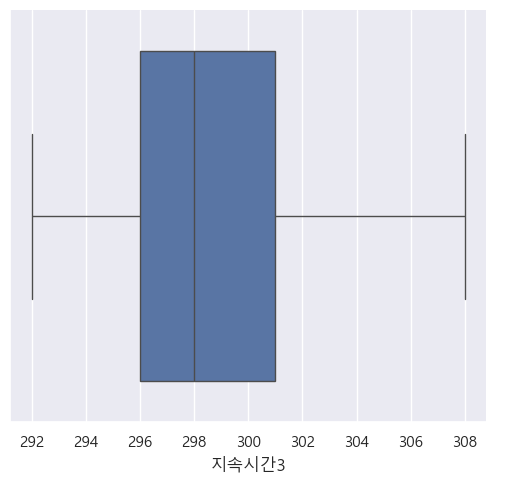

In [23]:
sns.catplot(data = pk_df,
            x = '지속시간3',
            kind = 'box')
plt.show()

이상치 또한 없음.

In [24]:
# 비모수 통계 검정

pg.wilcoxon(pk_df['지속시간3'], 300, alternative = "two-sided").round(3)



,W-val,alternative,p-val,RBC,CLES
Wilcoxon,351.5,two-sided,0.039,-0.35,0.324


지속시간3은 300분보다 작음.

## 2. 치아성장에 영향을 주는 보충제를 연구하였다. 보충제와 용량은 치아성장에 상호작용 영향을 주었는가?
- supp: 1:OJ(오렌지쥬스), 2:VC(비타민C)
- dose: 500, 1000, 2000
- 09_2.Tooth Growth.csv

In [33]:
tg_df = pd.read_csv('./data/09_2.ToothGrowth.csv', encoding="cp949")
tg_df.head()

,len,supp,dose
0,4.2,VC,500
1,11.5,VC,500
2,7.3,VC,500
3,5.8,VC,500
4,6.4,VC,500


In [35]:
tg_df['supp'] = tg_df['supp'].astype('category')

In [36]:
tg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   len     60 non-null     float64 
 1   supp    60 non-null     category
 2   dose    60 non-null     int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 1.2 KB


In [37]:
tg_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
len,60.0,18.813,7.649,4.2,13.075,19.25,25.275,33.9
dose,60.0,1166.667,628.872,500.0,500.000,1000.00,2000.000,2000.0


In [39]:
column = ['supp','dose'] #독립변수

formula = "len ~ " + " + ".join(column)
formula

'len ~ supp + dose'

In [40]:
from patsy import dmatrices

y, x = dmatrices(formula,
                 data = tg_df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [41]:
model = sm.OLS(y, x) # 회귀 모델 생성

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     67.72
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           8.72e-16
Time:                        14:30:49   Log-Likelihood:                -170.21
No. Observations:                  60   AIC:                             346.4
Df Residuals:                      57   BIC:                             352.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2725      1.282      7.231      0.0

In [43]:
# 잔차의 등분산성 검정 : breush-Pagan

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange Multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic', np.float64(1.4533063764810183)),
 ('p-value', np.float64(0.48352455074593004)),
 ('f-value', np.float64(0.7074563765471168)),
 ('f p-value', np.float64(0.4971724029809983))]

보충제와 용량의 p값은 0.001, 0.000 으로 치아 성장에 영향을 줌

정규성, 등분산성은 만족.

## 3. G의류에서는 새로운 옷을 디자인하려고 하는데, 키와 몸무게가 어떤 관계가 있는지를 보고자 한다. 키와 몸무게는 상관관계가 있는가?
- 11_2.weight.csv


In [47]:
w_df = pd.read_csv('./data/11_2.weight.csv', encoding = 'cp949')
w_df.head(10)

,몸무게,키
0,72,176
1,72,172
2,70,182
3,43,160
4,48,163
5,54,165
6,51,168
7,52,163
8,73,182
9,45,148


In [46]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   몸무게     30 non-null     int64
 1   키       30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


In [50]:
column = ['몸무게'] #독립변수

formula = "키 ~ " + " + ".join(column)
formula

'키 ~ 몸무게'

In [52]:
y, X = dmatrices(formula,
                 data = w_df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

model = sm.OLS(y, X)
result = model.fit()

In [53]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      키   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     77.20
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.54e-09
Time:                        14:44:54   Log-Likelihood:                -87.047
No. Observations:                  30   AIC:                             178.1
Df Residuals:                      28   BIC:                             180.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.8455      4.683     27.729      0.0

키와 몸무게에는 상관관계가 있음.


## 4. Toyota 중고차 가격을 결정하는 모델을 만들고자 한다. 주행거리에 따라서 중고차 가격이 어떻게 결정되는지 가격모델을 만들어 보세요.
- 12_3.toyota.csv

In [48]:
t_df = pd.read_csv('./data/12_3.toyota.csv', encoding = 'cp949')
t_df.head(10)

,id,price,km
0,1,12900,23000
1,2,8500,61977
2,3,7750,69000
3,4,9799,59000
4,5,9950,57948
5,6,13950,13748
6,7,9695,43000
7,8,9000,61165
8,9,8950,38900
9,10,11895,39439


In [78]:
column = ['km'] # 독립변수: 주행거리
formula = "price ~ " + " + ".join(column) # 수식: 가격 ~ 주행거리

In [79]:
from patsy import dmatrices
y, X = dmatrices(formula,
                 data = t_df,
                 return_type = 'dataframe')

In [80]:
import statsmodels.api as sm
model = sm.OLS(y, X)
result = model.fit()


In [81]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     593.6
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           3.90e-46
Time:                        15:07:49   Log-Likelihood:                -913.34
No. Observations:                 112   AIC:                             1831.
Df Residuals:                     110   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.539e+04    239.045     64.398      0.0

관계 없음

## 5. 2006년 “약물 사용: 대학생 운동선수의 약물 사용에 대한 NCAA 연구 보고서”이다. 운동선수의 스테로이드 사용과 Division1과 관계가 있는가?
- 16_2.ncaa.csv

In [54]:
n_df = pd.read_csv('./data/16_2.ncaa.csv', encoding = 'cp949')
n_df.head(10)

,steroid,division,count
0,1,1,103
1,1,2,52
2,1,3,65
3,2,1,8440
4,2,2,4289
5,2,3,6428


In [71]:
# 범주형 변수 처리

n_df['steroid'].replace({1:'사용', 2:'미사용'}, inplace = True)
n_df['steroid'] = n_df['steroid'].astype('category')

n_df['division'].replace({1:'division1', 2:'division2', 3:'division2'}, inplace = True)
n_df['division'] = n_df['division'].astype('category')

n_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19756\872659208.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n_df['steroid'].replace({1:'사용', 2:'미사용'}, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_19756\872659208.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,steroid,division,count
0,사용,division1,103
1,사용,division2,52
2,사용,division2,65
3,미사용,division1,8440
4,미사용,division2,4289


In [72]:
tab = pd.crosstab(n_df['steroid'],
                  n_df['division'],
                  values=n_df['count'],
                  aggfunc='sum')

tab = tab.loc[['사용', '미사용'], :]

tab

division,division1,division2
steroid,,
사용,103,117
미사용,8440,10717


In [73]:
result = sm.stats.Table(tab)

print(result.table_orig)

division  division1  division2
steroid                       
사용              103        117
미사용            8440      10717


In [74]:
# pearson 검정

rslt = result.test_nominal_association()

print(rslt.pvalue)

0.4121090319832318


In [75]:
# 표준화 잔차

result.standardized_resids

division,division1,division2
steroid,,
사용,0.820188,-0.820188
미사용,-0.820188,0.820188


In [76]:
table = tab.to_numpy()
table

array([[  103,   117],
       [ 8440, 10717]])

In [77]:
t22 = sm.stats.Table2x2(table)

print(t22.summary())


               Estimate   SE   LCB    UCB  p-value
--------------------------------------------------
Odds ratio        1.118        0.856 1.459   0.412
Log odds ratio    0.111 0.136 -0.155 0.378   0.412
Risk ratio        1.063        0.922 1.224   0.401
Log risk ratio    0.061 0.072 -0.081 0.203   0.401
--------------------------------------------------


두 집단 간 관계 없음

#